In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataset
df = pd.read_csv("/Users/mr19th/Desktop/homework/horror movies data/netflix_titles.csv")

#create a df that contains all horror movies
horror_movies = df['listed_in'].str.contains('Horror Movies', case=False, na=False)
df[horror_movies].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...
43,s44,Movie,Jaws 3,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,"September 16, 2021",1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...
44,s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,"September 16, 2021",1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody..."
200,s201,Movie,Krishna Cottage,Santram Varma,"Sohail Khan, Isha Koppikar, Natassha, Rati Agn...",India,"August 27, 2021",2004,TV-14,124 min,"Action & Adventure, Horror Movies, Internation...",True love is put to the test when another woma...


In [166]:
#create a df that contains all movies, and count them
df_total_movies = df[df["type"].str.contains("Movie")]
df_total_movies.groupby(["release_year"])["show_id"].count()

#create a df that contains all movies other than horror movies, and count them
df_other_movies = df_total_movies[~df_total_movies["listed_in"].str.contains("Horror Movies")]
df_other_movies.groupby(["release_year"])["show_id"].count()

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    720
2018    716
2019    599
2020    488
2021    257
Name: show_id, Length: 73, dtype: int64

In [138]:
#counting the total Horror Movies release per year
df[horror_movies].groupby(["release_year"])["show_id"].count()

release_year
1968     1
1974     1
1976     1
1977     1
1978     1
1981     1
1983     1
1985     1
1987     2
1988     2
1990     1
1992     2
1995     1
1996     1
1997     2
1999     2
2000     4
2001     1
2002     1
2003     5
2004     3
2005     3
2006     5
2007     4
2008     5
2009    12
2010    11
2011     8
2012     7
2013    15
2014    19
2015    20
2016    32
2017    47
2018    51
2019    34
2020    29
2021    20
Name: show_id, dtype: int64

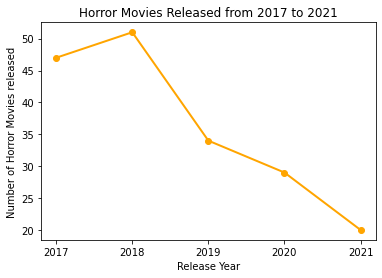

In [174]:
#make a scatter plot comparing horror movie releases before (2017-2019) and after (2020-2021)the pandemic broke out

year = [2017, 2018, 2019, 2020, 2021]
test_list = [str(i) for i in year]
movie_released = [47, 51, 34, 29, 20]
x = test_list
y = movie_released
plt.scatter(x, y, facecolors= 'orange', edgecolors='orange')
plt.title("Horror Movies Released from 2017 to 2021")
plt.ylabel("Number of Horror Movies released")
plt.xlabel("Release Year")
plt.plot(x, y, linewidth=2, color= "orange")
plt.show()

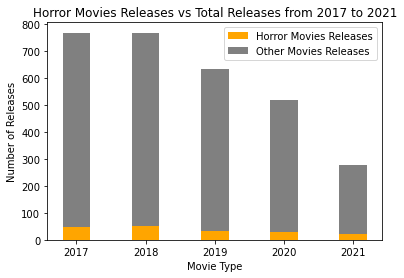

In [175]:
#create a stack line graph to show the relationship between horror movie releases and all other movie releases
X = ['2017','2018','2019','2020', '2021']
Horror_Movies_releases = [47, 51, 34, 29, 20]
Other_Movies_releases = [720, 716, 599, 488, 257]
Y1 = Horror_Movies_releases
Y2 = Other_Movies_releases
  
X_axis = np.arange(len(X))
  
plt.bar(X, Y1, 0.4, label = 'Horror Movies Releases', color = 'orange')
plt.bar(X, Y2, 0.4, bottom=Y1, label = 'Other Movies Releases', color = 'grey')
  
plt.xticks(X_axis, X)
plt.xlabel("Movie Type")
plt.ylabel("Number of Releases")
plt.title("Horror Movies Releases vs Total Releases from 2017 to 2021")
plt.legend()
plt.show()